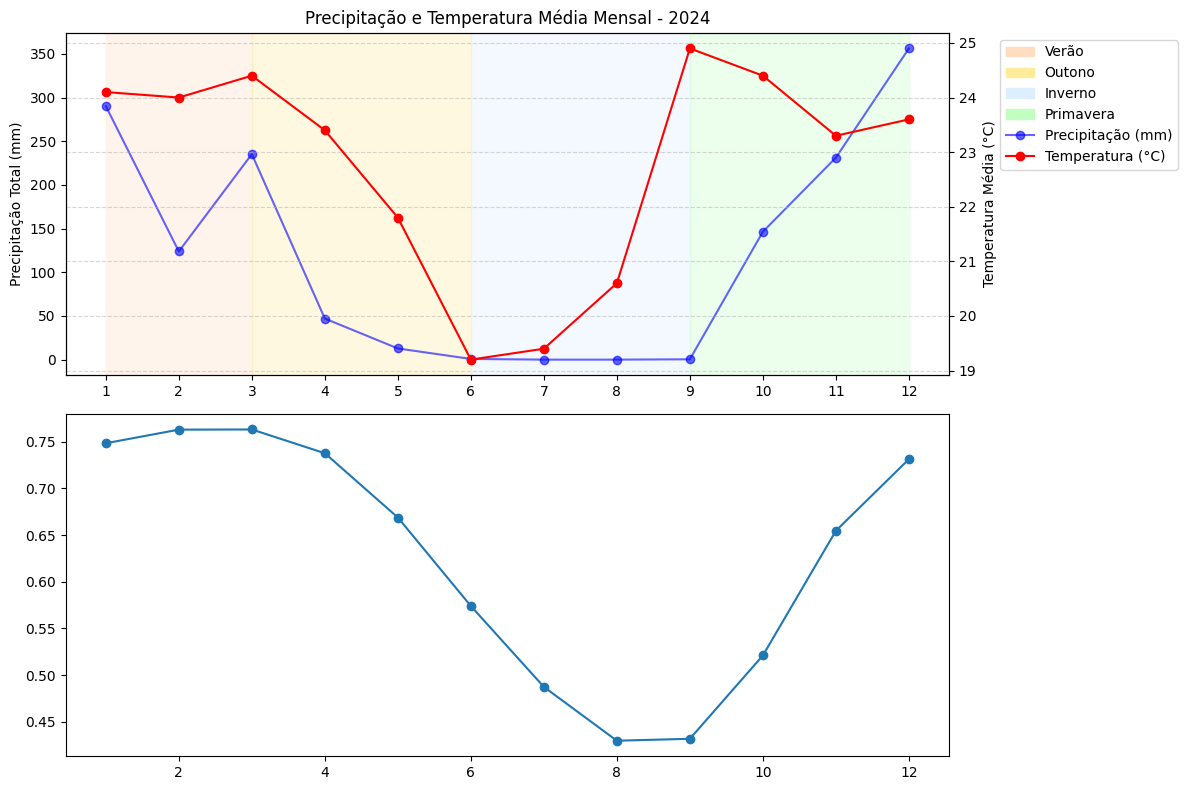

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


df = pd.read_csv("bra-ndvi-adm2-5ytd.csv", skiprows=1)

# Divinóplis BR3122306
df = df[df['#adm2+code'] == 'BR3122306']

df['#date'] = pd.to_datetime(df['#date'], errors='coerce')
df = df.dropna(subset=['#date'])

df['year'] = df['#date'].dt.year
df['month'] = df['#date'].dt.month

df = df[df['year'] == 2024]

df['time_index'] = df['year'] + (df['month'] - 1) / 12  

time_series_avg = df.groupby('time_index')['#indicator+vim+num'].mean()
time_series_avg.index = range(1, 13)

patches = []  # Lista para armazenar os patches da legenda

# Criando o gráfico com tamanho aumentado
fig, ax = plt.subplots(nrows=2, figsize=(12, 8))  # Tamanho maior: 12x8 polegadas

df = pd.read_csv("dados_A564_M_2024-01-01_2024-12-31.csv", sep=';', decimal=',')

# Convertendo a coluna de datas
df["Data Medicao"] = pd.to_datetime(df["Data Medicao"], format="%Y-%m-%d")

# Removendo a coluna "Unnamed: 3"
df.drop(columns=["Unnamed: 3"], inplace=True)

# Renomeando colunas para facilitar
df.columns = ["Data", "Precipitacao", "Temperatura"]

# Substituindo valores ausentes por NaN
df["Precipitacao"] = pd.to_numeric(df["Precipitacao"], errors='coerce')

df.set_index("Data", inplace=True)

estacoes = {
    "Verão": (1, 3, "#FFDDC1"),  # Verão - Bege claro
    "Outono": (3, 6, "#FFEB99"),  # Outono - Amarelo claro
    "Inverno": (6, 9, "#DDEEFF"),  # Inverno - Azul claro
    "Primavera": (9, 12, "#C1FFC1")  # Primavera - Verde claro
}

for estacao, (inicio, fim, cor) in estacoes.items():
    ax[0].axvspan(inicio, fim, color=cor, alpha=0.3)
    patches.append(mpatches.Patch(color=cor, label=estacao))

# Plotando precipitação (barras azuis)
precip_line, = ax[0].plot(range(1, 13), df["Precipitacao"], color='blue', marker='o', alpha=0.6, label='Precipitação (mm)')
ax[0].set_ylabel("Precipitação Total (mm)")
ax[0].tick_params(axis='y')

# Criando um segundo eixo para a temperatura
ax2 = ax[0].twinx()
temp_line, = ax2.plot(range(1, 13), df["Temperatura"], color='red', marker='o', label='Temperatura (°C)')
ax2.set_ylabel("Temperatura Média (°C)")
ax2.tick_params(axis='y')

 
ax[1].plot(time_series_avg.index, time_series_avg.values, marker='o', linestyle='-')

# Melhorando a exibição do eixo X
plt.xticks(ticks=range(1, 13), rotation=45)
plt.title("Precipitação e Temperatura Média Mensal - 2024")
plt.grid(axis='y', linestyle='--', alpha=0.5)

total_legend = patches + [precip_line, temp_line]

# Ajustando a legenda para fora do gráfico
plt.legend(handles=total_legend, loc='upper left', bbox_to_anchor=(1.05, 1))

# Exibindo o gráfico
plt.tight_layout()  # Ajusta o layout para garantir que a legenda não sobreponha nada
plt.show()

